<a href="https://colab.research.google.com/github/magalhaesaamanda/Facul_XPE/blob/main/Operadora_de_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Ciência de Dados

### Importando bibliotecas e verificando as versões


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import sklearn
import plotly

In [ ]:
print(f'''Verificando as versões das bibliotecas:\n
pandas:{pd.__version__}
sklearn:{sklearn.__version__}
plotly:{plotly.__version__}
''')

Verificando as versões das bibliotecas:

pandas:1.3.5
sklearn:1.0.2
plotly:5.5.0



# Coleta de dados

In [ ]:
# Estados

estados = pd.read_csv('/content/estados_br.csv', sep= ';', encoding= 'latin-1')

In [ ]:
# Idade dos Clientes

idade = pd.read_csv('/content/idade_clientes.csv', sep= ';')

In [ ]:
# Clientes da Operadora de Saúde

clientes = pd.read_excel('/content/clientes_operadora_saude.xlsx')

## Analisando os dados

### Estados

In [ ]:
estados.head()

id_estado    estado sigla_estado    pais
0          1      Acre           ac  Brasil
1          2   Alagoas           al     NaN
2          3     Amapá           ap  Brasil
3          4  Amazonas           am     NaN
4          5     Bahia           ba  Brasil

In [ ]:
estados.describe()

id_estado
count  27.000000
mean   14.000000
std     7.937254
min     1.000000
25%     7.500000
50%    14.000000
75%    20.500000
max    27.000000

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
estados.shape

(27, 4)

### Clientes

In [ ]:
clientes.head()

id_cliente   peso  colesterol     genero  id_estado
0           1  102.0         111  Masculino         23
1           2  115.0         135  Masculino          7
2           3  115.0         136  Masculino          4
3           4  140.0         167   Feminino         24
4           5  130.0         158  Masculino         26

In [ ]:
clientes.describe()

id_cliente        peso  colesterol   id_estado
count  225.000000  222.000000  225.000000  225.000000
mean   113.000000  142.315315  168.733333   13.711111
std     65.096083   31.198817   39.413671    7.562307
min      1.000000   95.000000  102.000000    1.000000
25%     57.000000  115.000000  135.000000    7.000000
50%    113.000000  138.500000  168.000000   14.000000
75%    169.000000  170.000000  204.000000   20.000000
max    225.000000  203.000000  235.000000   27.000000

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.shape

(225, 5)

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


### Idade

In [ ]:
idade.head()

id_cliente  idade
0           1     17
1           2     28
2           3     62
3           4     55
4           5     44

In [ ]:
idade.describe()

id_cliente       idade
count   547.00000  547.000000
mean    274.00000   42.791590
std     158.04957   15.160209
min       1.00000   16.000000
25%     137.50000   30.000000
50%     274.00000   42.000000
75%     410.50000   55.000000
max     547.00000   70.000000

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.shape

(547, 2)

### Visualizando os dados ausentes


In [ ]:
clientes.loc[clientes['peso'].isnull()]

id_cliente  peso  colesterol     genero  id_estado
32          33   NaN         188  Masculino         22
41          42   NaN         177  Masculino         20
87          88   NaN         168   Feminino         12

## Tratamento dos dados

### Dados ausentes numéricos


#### Descobrindo os dados ausentes

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

#### Eliminando dados


In [ ]:
# Eliminando o dado
clientes.dropna(subset=['peso'], inplace= False)

id_cliente   peso  colesterol     genero  id_estado
0             1  102.0         111  Masculino         23
1             2  115.0         135  Masculino          7
2             3  115.0         136  Masculino          4
3             4  140.0         167   Feminino         24
4             5  130.0         158  Masculino         26
..          ...    ...         ...        ...        ...
220         221  180.0         219  Masculino         20
221         222  116.0         138   Feminino         15
222         223  144.0         169   Feminino         18
223         224  102.0         116  Masculino          6
224         225  176.0         212  Masculino          7

[222 rows x 5 columns]

In [ ]:
clientes.count()

id_cliente    225
peso          222
colesterol    225
genero        225
id_estado     225
dtype: int64

#### Corrigindo dados ausentes (média/mediana)

In [ ]:
# Média e Mediana

media = clientes.peso.mean()
mediana = clientes.peso.median()

In [ ]:
# Corrigir dados por média

clientes.describe()

id_cliente        peso  colesterol   id_estado
count  225.000000  222.000000  225.000000  225.000000
mean   113.000000  142.315315  168.733333   13.711111
std     65.096083   31.198817   39.413671    7.562307
min      1.000000   95.000000  102.000000    1.000000
25%     57.000000  115.000000  135.000000    7.000000
50%    113.000000  138.500000  168.000000   14.000000
75%    169.000000  170.000000  204.000000   20.000000
max    225.000000  203.000000  235.000000   27.000000

In [ ]:
clientes.peso.fillna(round(media,2), inplace=True)

### Dados ausentes para variável categórica


#### Descobrindo dados ausentes

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
# Contando valores contidos em "pais"
estados.pais.value_counts()

Brasil    22
Name: pais, dtype: int64

#### Corrigindo dados categóricos

In [ ]:
# Descobrindo a moda de "país"
estados.pais.mode()

0    Brasil
dtype: object

In [ ]:
# Criando variável com a ccorreção dos termos em "país"
correcao_pais = estados.pais.mode()[0]

In [ ]:
estados.pais.fillna(correcao_pais, inplace= True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Manipulação e visualização de dados

### Tipos de gráficos para a visualização dos dados

#### Histogramas

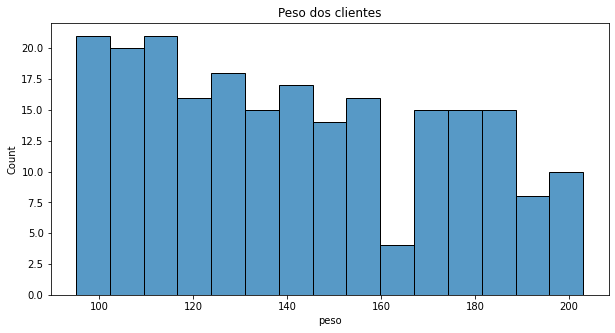

In [ ]:
# Criando histograma com base no peso dos clientes
plt.figure(figsize = (10,5))
plt.title('Peso dos clientes')
sns.histplot(clientes.peso, bins=15)

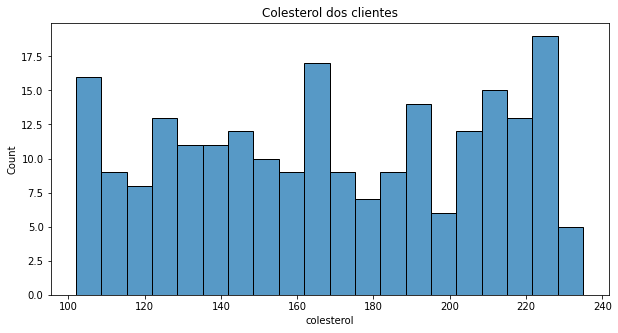

In [ ]:
# Criando histograma com base no colesterol dos clientes
plt.figure(figsize=(10,5))
plt.title("Colesterol dos clientes")
sns.histplot(clientes.colesterol, bins=20)

#### Box Plot

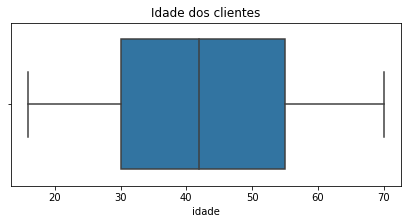

In [ ]:
# Criando boxplot baseado na idade dos clientes

plt.figure(figsize=(7,3))
plt.title("Idade dos clientes")
sns.boxplot(x = 'idade', data=idade, orient= 'h')

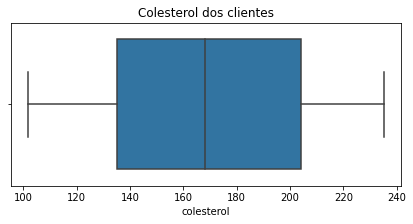

In [ ]:
# Criando boxplot baseado no colesterol dos clientes

plt.figure(figsize=(7,3))
plt.title("Colesterol dos clientes")
sns.boxplot(x = 'colesterol', data=clientes, orient= 'h')

#### Heatmap - Gráfico de correlação

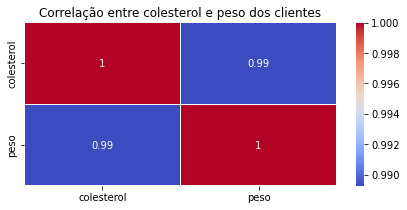

In [ ]:
# Correlação entre colesterol e peso dos clientes

plt.figure(figsize=(7,3))
plt.title("Correlação entre colesterol e peso dos clientes")
corr_col_e_pes = clientes[['colesterol', 'peso']]
sns.heatmap(corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white', annot= True)

### Enriquencendo os dados

#### Criando função para gerar código classificatorios

In [ ]:
# Importando biblioteca Label

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
# Criando uma variável nova dentro do data frame clientes, chamada id_genero, na transformação do LE - Label Enconder de clientes['genero']
clientes['id_genero'] = LE.fit_transform(clientes['genero'])


In [ ]:
clientes.head()

id_cliente   peso  colesterol     genero  id_estado  id_genero
0           1  102.0         111  Masculino         23          1
1           2  115.0         135  Masculino          7          1
2           3  115.0         136  Masculino          4          1
3           4  140.0         167   Feminino         24          0
4           5  130.0         158  Masculino         26          1

#### Junções dos dados coletados

##### Verificando dados

In [ ]:
# Verificando dados de estados

estados.head()

id_estado    estado sigla_estado    pais
0          1      Acre           ac  Brasil
1          2   Alagoas           al  Brasil
2          3     Amapá           ap  Brasil
3          4  Amazonas           am  Brasil
4          5     Bahia           ba  Brasil

In [ ]:
# Verificando dados dos clientes

clientes.head()

id_cliente   peso  colesterol     genero  id_estado  id_genero
0           1  102.0         111  Masculino         23          1
1           2  115.0         135  Masculino          7          1
2           3  115.0         136  Masculino          4          1
3           4  140.0         167   Feminino         24          0
4           5  130.0         158  Masculino         26          1

#### Realizando junções dos datasets

In [ ]:
# Merge = juntar duas tabelas

clientes_estados = pd.merge(clientes, estados, on = 'id_estado')
clientes_estados.sort_values('id_estado')


id_cliente   peso  colesterol     genero  id_estado  id_genero  \
201         203  145.0         173   Feminino          1          0   
199         104  118.0         140   Feminino          1          0   
198          98  149.0         185   Feminino          1          0   
197          38   96.0         105  Masculino          1          1   
200         113  122.0         145  Masculino          1          1   
..          ...    ...         ...        ...        ...        ...   
107          44  193.0         224   Feminino         27          0   
109          89  124.0         148   Feminino         27          0   
110         134  156.0         195   Feminino         27          0   
111         152  200.0         233  Masculino         27          1   
108          80  123.0         147   Feminino         27          0   

        estado sigla_estado    pais  
201       Acre           ac  Brasil  
199       Acre           ac  Brasil  
198       Acre           ac  Brasil  
197       Acre           ac  Brasil  
200       Acre           ac  Brasil  
..         ...          ...     ...  
107  Tocantins           to  Brasil  
109  Tocantins           to  Brasil  
110  Tocantins           to  Brasil  
111  Tocantins           to  Brasil  
108  Tocantins           to  Brasil  

[225 rows x 9 columns]

In [ ]:
clientes_info = pd.merge(clientes_estados, idade, on= 'id_cliente').sort_values('id_cliente')

In [ ]:
clientes_info[:10]

id_cliente   peso  colesterol     genero  id_estado  id_genero  \
0            1  102.0         111  Masculino         23          1   
9            2  115.0         135  Masculino          7          1   
21           3  115.0         136  Masculino          4          1   
32           4  140.0         167   Feminino         24          0   
39           5  130.0         158  Masculino         26          1   
47           6  198.0         227  Masculino          8          1   
40           7  114.0         131  Masculino         26          1   
56           8  145.0         176   Feminino         25          0   
61           9  191.0         223   Feminino         16          0   
66          10  186.0         221  Masculino          6          1   

              estado sigla_estado    pais  idade  
0            Roraima           rr  Brasil     17  
9   Distrito Federal           df  Brasil     28  
21          Amazonas           am  Brasil     62  
32    Santa Catarina           sc  Brasil     55  
39           Sergipe           se  Brasil     44  
47    Espírito Santo           es  Brasil     17  
40           Sergipe           se  Brasil     30  
56         São Paulo           sp  Brasil     30  
61            Paraná           pr  Brasil     34  
66             Ceará           ce  Brasil     55

In [ ]:
# Resetando o index do dataframe

clientes_info.reset_index(drop=True)

id_cliente   peso  colesterol     genero  id_estado  id_genero  \
0             1  102.0         111  Masculino         23          1   
1             2  115.0         135  Masculino          7          1   
2             3  115.0         136  Masculino          4          1   
3             4  140.0         167   Feminino         24          0   
4             5  130.0         158  Masculino         26          1   
..          ...    ...         ...        ...        ...        ...   
220         221  180.0         219  Masculino         20          1   
221         222  116.0         138   Feminino         15          0   
222         223  144.0         169   Feminino         18          0   
223         224  102.0         116  Masculino          6          1   
224         225  176.0         212  Masculino          7          1   

                  estado sigla_estado    pais  idade  
0                Roraima           rr  Brasil     17  
1       Distrito Federal           df  Brasil     28  
2               Amazonas           am  Brasil     62  
3         Santa Catarina           sc  Brasil     55  
4                Sergipe           se  Brasil     44  
..                   ...          ...     ...    ...  
220  Rio Grande do Norte           rn  Brasil     33  
221              Paraíba           pb  Brasil     38  
222                Piauí           pi  Brasil     24  
223                Ceará           ce  Brasil     31  
224     Distrito Federal           df  Brasil     57  

[225 rows x 10 columns]

### Organizando a base de dados

#### Alterando nome das colunas

In [ ]:
clientes_info.rename(columns = {'id_genero': 'cod_genero', 'id_cliente' : 'cod_cliente'}, inplace=True)

#### Alterando conteúdo da variável siglas do estado

In [ ]:
clientes_info['sigla_estado'] = clientes_info.sigla_estado.str.upper()

In [ ]:
clientes_info

cod_cliente   peso  colesterol     genero  id_estado  cod_genero  \
0              1  102.0         111  Masculino         23           1   
9              2  115.0         135  Masculino          7           1   
21             3  115.0         136  Masculino          4           1   
32             4  140.0         167   Feminino         24           0   
39             5  130.0         158  Masculino         26           1   
..           ...    ...         ...        ...        ...         ...   
167          221  180.0         219  Masculino         20           1   
126          222  116.0         138   Feminino         15           0   
196          223  144.0         169   Feminino         18           0   
77           224  102.0         116  Masculino          6           1   
20           225  176.0         212  Masculino          7           1   

                  estado sigla_estado    pais  idade  
0                Roraima           RR  Brasil     17  
9       Distrito Federal           DF  Brasil     28  
21              Amazonas           AM  Brasil     62  
32        Santa Catarina           SC  Brasil     55  
39               Sergipe           SE  Brasil     44  
..                   ...          ...     ...    ...  
167  Rio Grande do Norte           RN  Brasil     33  
126              Paraíba           PB  Brasil     38  
196                Piauí           PI  Brasil     24  
77                 Ceará           CE  Brasil     31  
20      Distrito Federal           DF  Brasil     57  

[225 rows x 10 columns]

#### Alterando disposições das colunas

In [ ]:
# Selecionar a ordem das colunas
ordem_colunas = ['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado']
clientes_info[ordem_colunas] 

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
9              2  Masculino     28  115.0         135          7   
21             3  Masculino     62  115.0         136          4   
32             4   Feminino     55  140.0         167         24   
39             5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
167          221  Masculino     33  180.0         219         20   
126          222   Feminino     38  116.0         138         15   
196          223   Feminino     24  144.0         169         18   
77           224  Masculino     31  102.0         116          6   
20           225  Masculino     57  176.0         212          7   

                  estado sigla_estado  
0                Roraima           RR  
9       Distrito Federal           DF  
21              Amazonas           AM  
32        Santa Catarina           SC  
39               Sergipe           SE  
..                   ...          ...  
167  Rio Grande do Norte           RN  
126              Paraíba           PB  
196                Piauí           PI  
77                 Ceará           CE  
20      Distrito Federal           DF  

[225 rows x 8 columns]

In [ ]:
# Atribuindo as colunas e arrumando o index

clientes_info = clientes_info[ordem_colunas].reset_index(drop=True)

# Aplicação do modelo de machine learning


####Importando biblioteca

In [ ]:
from sklearn.cluster import KMeans

## Aplicando o metodo cotovelo

### Calculando WCSS

In [ ]:
# Criando função para calcular WCSS

def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
# Criando dados dos clientes de peso, colesterol e idade

clientes_pci = clientes_info[['peso', 'colesterol', 'idade']]

In [ ]:
# Calculando WCSS dos clientes

wcss_clientes = calcular_wcss(clientes_pci)

In [ ]:
wcss_clientes

[615755.6435484447,
 189212.54409773235,
 110985.62659521378,
 85993.49644839708,
 72765.0926995486,
 60402.61567119764,
 49363.864657354534,
 42246.69687529805,
 36793.297727438636,
 31628.83439189302]

In [ ]:
# Visualizando os dados obtidos do WCSS 
for i in range(len(wcss_clientes)):
  print('O cluster', i, ' tem o valor', wcss_clientes[i])

O cluster 0  tem o valor 615755.6435484447
O cluster 1  tem o valor 189212.54409773235
O cluster 2  tem o valor 110985.62659521378
O cluster 3  tem o valor 85993.49644839708
O cluster 4  tem o valor 72765.0926995486
O cluster 5  tem o valor 60402.61567119764
O cluster 6  tem o valor 49363.864657354534
O cluster 7  tem o valor 42246.69687529805
O cluster 8  tem o valor 36793.297727438636
O cluster 9  tem o valor 31628.83439189302


In [ ]:
# Visualizando os dados obtidos do WCSS

grafico_wcss = px.line(x=range(1,11), y = wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando WCSS',
                  title_x= 0.5,
                  xaxis_title ='Número de Clusters',
                  yaxis_title ='Valor dos Clusters',
                  template='plotly_white')

### Criando agrupamento para cada cliente

In [ ]:
# Aplicando algoritmo KMeans
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
clientes_info['clusters'] = kmeans_clientes.fit_predict(clientes_pci)

In [ ]:
clientes_info.head()

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0            1  Masculino     17  102.0         111         23   
1            2  Masculino     28  115.0         135          7   
2            3  Masculino     62  115.0         136          4   
3            4   Feminino     55  140.0         167         24   
4            5  Masculino     44  130.0         158         26   

             estado sigla_estado  clusters  
0           Roraima           RR         1  
1  Distrito Federal           DF         1  
2          Amazonas           AM         1  
3    Santa Catarina           SC         2  
4           Sergipe           SE         2

### Calculando centroides dos clusters

In [ ]:
centr_cluster = kmeans_clientes.cluster_centers_

In [ ]:
centr_cluster

NameError: ignored

### Plotar gráfico

In [ ]:
grafico = px.scatter(x=clientes_info['peso'],
                     y=clientes_info['colesterol'],
                     color=clientes_info['clusters'])

grafico_centr = px.scatter(x=centr_cluster[:,0],
                           y=centr_cluster[:,1],
                           size= [3,3,3])

grafico_final = go.Figure(data = grafico.data + grafico_centr.data)
grafico_final.update_layout(title='Análise de Clusters',
                            title_x= 0.5,
                            xaxis_title='peso',
                            yaxis_title='colesterol',
                            template='plotly_white')

### Criando funções para gerar gráfico

In [ ]:
def grafico_scatter(x, y, cor, x_cluster, y_cluster, titulo, x_titulo, y_titulo):
  gr1 = px.scatter(x = x,
                   y= y,
                   color= cor)

  gr2 = px.scatter(x= x_cluster,
                   y= y_cluster,
                   size= [3,3,3])

  gf = go.Figure(data = gr1.data + gr2.data)
  gf.update_layout(title= titulo,
                   title_x= 0.5,
                   xaxis_title= x_titulo,
                   yaxis_title= y_titulo,
                   template='plotly_white')
  gf.show()

# Analisando dados gerados

## Segmentando clientes baseado na análise dos clusters

In [ ]:
# Gerando gráfico da análise dos clusters

x= 'colesterol'
y= 'peso'

grafico_scatter(clientes_info[x], clientes_info[y],  clientes_info['clusters'], centr_cluster[:,1], centr_cluster[:,0], 'Colesterol e Peso', x, y)

In [ ]:
# Criando cópia para fazer a segmentação dos clientes
cluster_clientes = clientes_info

In [ ]:
# Segmentando clientes
cluster_clientes.loc[cluster_clientes['clusters']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['clusters']==2, 'nome_cluster'] = 'Moderado Risco'
cluster_clientes.loc[cluster_clientes['clusters']==0, 'nome_cluster'] = 'Alto Risco'

In [ ]:
# Visualizando dos dados
cluster_clientes

cod_cliente     genero  idade   peso  colesterol  id_estado  \
0              1  Masculino     17  102.0         111         23   
1              2  Masculino     28  115.0         135          7   
2              3  Masculino     62  115.0         136          4   
3              4   Feminino     55  140.0         167         24   
4              5  Masculino     44  130.0         158         26   
..           ...        ...    ...    ...         ...        ...   
220          221  Masculino     33  180.0         219         20   
221          222   Feminino     38  116.0         138         15   
222          223   Feminino     24  144.0         169         18   
223          224  Masculino     31  102.0         116          6   
224          225  Masculino     57  176.0         212          7   

                  estado sigla_estado  clusters    nome_cluster  
0                Roraima           RR         1     Baixo Risco  
1       Distrito Federal           DF         1     Baixo Risco  
2               Amazonas           AM         1     Baixo Risco  
3         Santa Catarina           SC         2  Moderado Risco  
4                Sergipe           SE         2  Moderado Risco  
..                   ...          ...       ...             ...  
220  Rio Grande do Norte           RN         0      Alto Risco  
221              Paraíba           PB         1     Baixo Risco  
222                Piauí           PI         2  Moderado Risco  
223                Ceará           CE         1     Baixo Risco  
224     Distrito Federal           DF         0      Alto Risco  

[225 rows x 10 columns]

## Criando análise gráfica


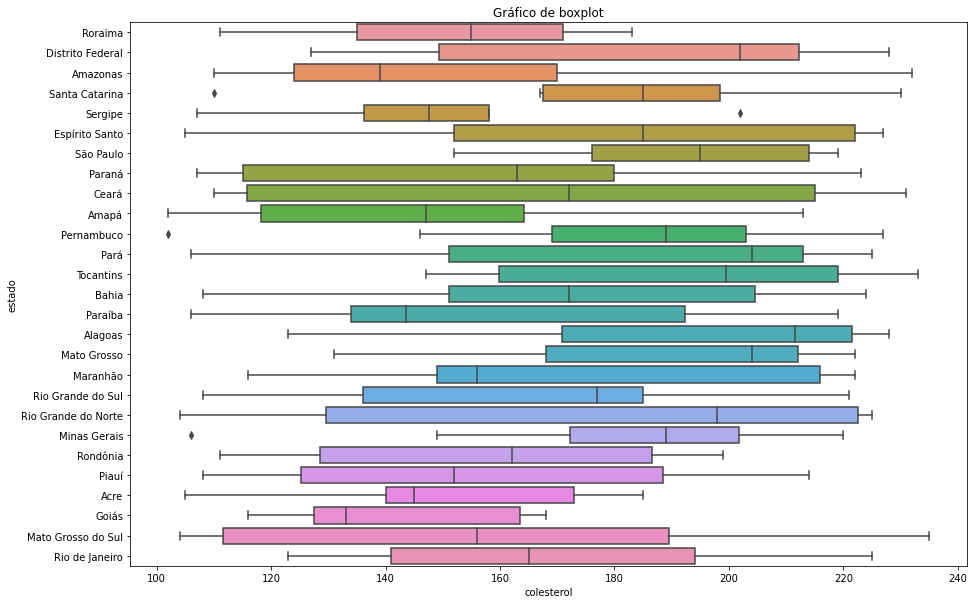

In [ ]:
# Criando análise gráfica do colesterol por estado

plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='colesterol', y= 'estado', data= cluster_clientes, orient= 'h')

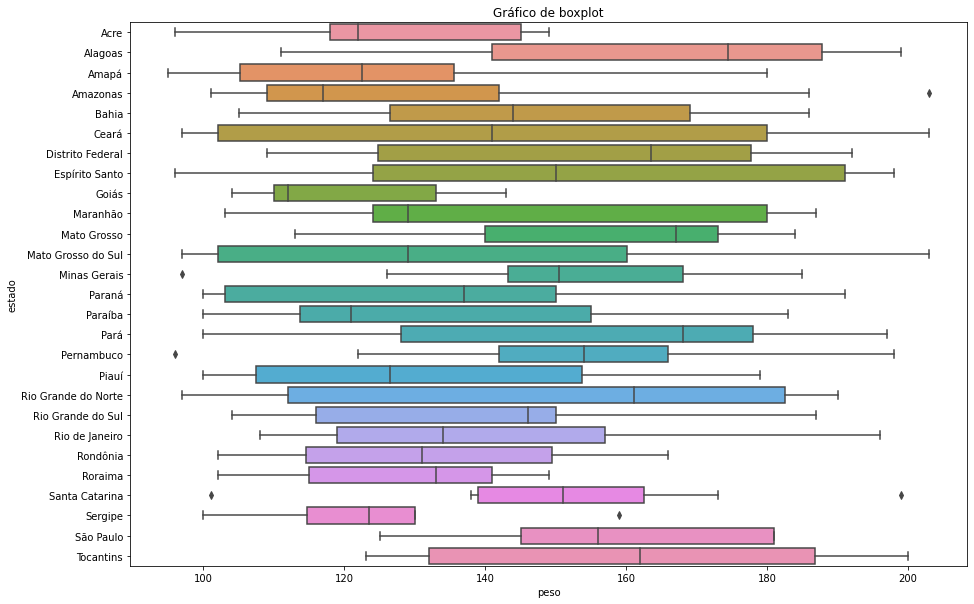

In [ ]:
# Criando análise gráfica do peso por estado

plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='peso', y= 'estado', data= cluster_clientes.sort_values('estado'), orient= 'h')

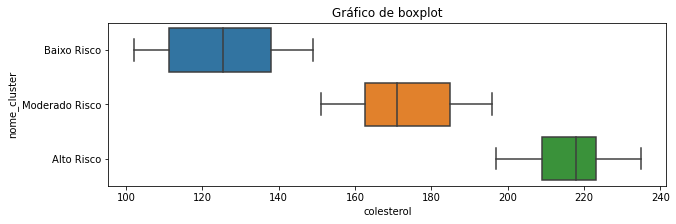

In [ ]:
plt.figure(figsize=(10,3))
plt.title("Gráfico de boxplot")
sns.boxplot(x='colesterol', y= 'nome_cluster', data= cluster_clientes, orient= 'h')

## Analise dos cluster criados

In [ ]:
# Agrupamento dados de clusters por genero
cluster_clientes.groupby(['nome_cluster'] ('genero')), as_index = False).agg(total=('genero', 'count'))

nome_cluster     genero  total
0      Alto Risco   Feminino     28
1      Alto Risco  Masculino     40
2     Baixo Risco   Feminino     39
3     Baixo Risco  Masculino     43
4  Moderado Risco   Feminino     44
5  Moderado Risco  Masculino     31

In [ ]:
# Agrupamento dados de cluster por medio do peso
cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = True).agg(total=('peso', 'mean'))

total
nome_cluster   genero    estado                      
Alto Risco     Feminino  Amazonas          164.000000
                         Bahia             185.500000
                         Ceará             177.000000
                         Distrito Federal  181.666667
                         Espírito Santo    193.000000
...                                               ...
Moderado Risco Masculino Rio de Janeiro    141.000000
                         Rondônia          139.440000
                         Roraima           145.333333
                         Santa Catarina    151.500000
                         Sergipe           128.000000

[116 rows x 1 columns]

In [ ]:
# Criando um dataframe com a tabela acima, mas com index=TRUE
media_peso = cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = False).agg(media=('peso', 'mean'))

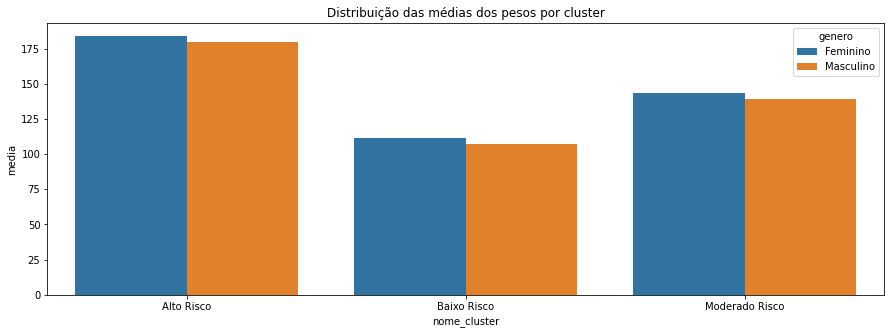

In [ ]:
# Criando gráfico de barras com as médias dos pesos por cluster
plt.figure(figsize= (15,5))
plt.title('Distribuição das médias dos pesos por cluster')
sns.barplot(x='nome_cluster', y= 'media', data= media_peso, hue='genero', ci=None)

In [ ]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

count       mean        std   min    25%   50%    75%   max
nome_cluster                                                               
Alto Risco       68.0  44.544118  15.977067  16.0  31.75  47.0  58.50  69.0
Baixo Risco      82.0  42.634146  15.442056  17.0  29.00  42.5  54.75  70.0
Moderado Risco   75.0  41.893333  14.699304  16.0  30.50  42.0  53.00  70.0

In [ ]:
# Verifica os valores de idade por estado
cluster_clientes.groupby('nome_cluster')['estado'].describe()

count unique               top freq
nome_cluster                                      
Alto Risco        68     24  Distrito Federal    6
Baixo Risco       82     26          Amazonas    8
Moderado Risco    75     26           Roraima    5

In [ ]:
# Visualização dos dados dos clientes por alto risco
cluster_clientes.query('nome_cluster == "Alto Risco"')

cod_cliente     genero  idade   peso  colesterol  id_estado  \
5              6  Masculino     17  198.0         227          8   
8              9   Feminino     34  191.0         223         16   
9             10  Masculino     55  186.0         221          6   
11            12  Masculino     62  188.0         222          6   
15            16   Feminino     65  178.0         213         14   
..           ...        ...    ...    ...         ...        ...   
206          207   Feminino     54  187.0         225         20   
216          217   Feminino     62  203.0         235         12   
219          220  Masculino     32  181.0         219         25   
220          221  Masculino     33  180.0         219         20   
224          225  Masculino     57  176.0         212          7   

                  estado sigla_estado  clusters nome_cluster  
5         Espírito Santo           ES         0   Alto Risco  
8                 Paraná           PR         0   Alto Risco  
9                  Ceará           CE         0   Alto Risco  
11                 Ceará           CE         0   Alto Risco  
15                  Pará           PA         0   Alto Risco  
..                   ...          ...       ...          ...  
206  Rio Grande do Norte           RN         0   Alto Risco  
216   Mato Grosso do Sul           MS         0   Alto Risco  
219            São Paulo           SP         0   Alto Risco  
220  Rio Grande do Norte           RN         0   Alto Risco  
224     Distrito Federal           DF         0   Alto Risco  

[68 rows x 10 columns]

# Exportando dados

In [ ]:
cluster_clientes.to_csv('classificação_clientes_cluster.csv', sep= ';', encoding='latin-1')